# Decision Trees (Pima Diabetes Dataset)

### Import modules

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
#import pygraphviz as pgv
#import pylab as pl

from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# to make this notebook's output stable across runs
np.random.seed(42)

### Define Input and Output

In [2]:
#pima = np.loadtxt('../data/pima-indians-diabetes.data', delimiter=',')
pima = np.loadtxt('pima-indians-diabetes.data', delimiter=',')

##Attribute Information:
#1. Number of times pregnant
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. Diastolic blood pressure (mm Hg)
#4. Triceps skin fold thickness (mm)
#5. 2-Hour serum insulin (mu U/ml)
#6. Body mass index (weight in kg/(height in m)^2)
#7. Diabetes pedigree function
#8. Age (years)
#9. Class variable (0 or 1)


### Preprocess the data

In [3]:
pima[np.where(pima[:,0]>8),0] = 8 #Pregnancy-more than 8 should be taken as 8
pima[np.where(pima[:,7]<=30),7] = 1 #quantize the age in 5 buckets
pima[np.where((pima[:,7]>30) & (pima[:,7]<=40)),7] = 2
pima[np.where((pima[:,7]>40) & (pima[:,7]<=50)),7] = 3
pima[np.where((pima[:,7]>50) & (pima[:,7]<=60)),7] = 4
pima[np.where(pima[:,7]>60),7] = 5

### Create X and Y data

In [4]:
X = pima[:, :8] #first 8 attributes are input features
y = pima[:,8:9] #the 9th attribute in the file is the output label
print('Class labels:', np.unique(y))


# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Class labels: [0. 1.]


### Train and Evaluate Data

In [5]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=42)
dtree.fit(X_train_std, y_train)
y_pred = dtree.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % dtree.score(X_test_std, y_test))

Misclassified samples: 56
Accuracy: 0.76
Accuracy: 0.76


### Plot the decision boundary

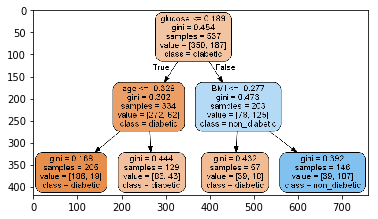

In [6]:

pima_feature_names = ['times_pregnant','glucose','BP','triceps_thickness',
                      'insulin','BMI','family_history','age']
pima_target_names = ['diabetic','non_diabetic']
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=pima_feature_names,
                                class_names = pima_target_names,rounded=True,filled=True )

#graph = pgv.AGraph(dot_data)
###from pydotplus import graph_from_dot_data
#graph = graph_from_dot_data(dot_data)
#graph.write_png('pima.png')
#graph.draw('pima.png')
#im = mpimg.imread('pima.png')
#plt.imshow(im)
###

from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)
graph.write_png("./pima.png")
# pima.png file is saved in the code directory
plt.imshow(mpimg.imread("./pima.png"))
plt.show()